In [1]:
import pandas as pd
from glob import glob
import os
from os.path import join
import numpy as np

In [2]:
dataPath = "rawData"
files = glob(join(dataPath, "snb-data*"))
# files.remove("rawData/snb-data-foreignCurrencyInvestment.csv")
files

['rawData/snb-data-reservePositions.csv',
 'rawData/snb-data-foreignCurrencyInvestment.csv',
 'rawData/snb-data-monetaryAssistanceLoans.csv',
 'rawData/snb-data-CPI.csv',
 'rawData/snb-data-exchangeRate.csv',
 'rawData/snb-data-callMoneyRate.csv']

In [3]:
df = []

for f in files:
    dfFile = pd.read_csv(f, skiprows = 3, sep = ";", index_col = 0)
    if "D1" in dfFile.columns:
        dfFile["D0"] = dfFile["D0"] + "_" + dfFile["D1"]
    dfFile = dfFile.pivot(columns = "D0", values = "Value")
 
    if f == "rawData/snb-data-foreignCurrencyInvestment.csv":
        dfFile.index = pd.to_datetime(dfFile.index).strftime("%Y-%m")

    df.append(dfFile)
df = pd.concat(df, axis = 1).sort_index()
df

D0,RAFAFX,RAFAGOLD,RAFAIMF,RAFAO,RAFASDR,RAXG,ICHF0,ICHF1,ICHF2,ICHF3,...,3M2,3M3,3M4,EG3M,ESTR,EURIBOR,SARON,SOFR,SONIA,TONA
Date,,,,,,,,,,,,,,,,,,,,,
1914-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03,715624.526372,66756.193747,1913.979440,-425.091831,11073.517905,728186.931886,NaN,NaN,NaN,NaN,...,NaN,5.3037,NaN,1.589,3.899,3.892,1.464207,5.34,5.1911,0.074
2024-04,720306.831437,70640.862862,1863.213446,-10.945579,11077.121241,733236.220546,280265.205531,273363.536399,59045.650642,45520.089773,...,NaN,NaN,NaN,1.307,3.889,3.825,1.444518,5.34,5.1998,0.076
2024-05,717694.593856,70773.436203,1804.181481,0.252651,11096.026584,730595.054573,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.298,3.892,3.785,1.450122,5.34,5.2000,0.077


In [79]:
# Y
eurchf_fx_df = df[["M0_EUR1"]]

# X1
chf_callmoneyrate_df = df[["SARON"]]

# X2
x2_total_names = ["T0", "T1", "T2", "T3", "T4"]
x2_chf_names = ["ICHF0", "ICHF1", "ICHF2", "ICHF3", "ICHF4", "ICHF5", "ICHF6"]
total_currency_investment_df = df[x2_total_names].ffill().sum(axis=1)
chf_foreign_currency_investment_df = df[x2_chf_names].ffill().sum(axis=1)
foreign_currency_investment_df = total_currency_investment_df - chf_foreign_currency_investment_df
proportion_foreign_currency_investment_df = foreign_currency_investment_df / total_currency_investment_df

# X3
chf_reserve_positions_imf_df = df[["RIWF"]].ffill().sum(axis=1)
chf_total_assets_df = df[["T0"]].ffill().sum(axis=1)
chf_proportion_reserve_positions_imf_df = chf_reserve_positions_imf_df / chf_total_assets_df

# X4
chf_monetary_assitance_loans_df = df[["W"]].ffill().sum(axis=1)
chf_total_assets_df = df[["T0"]].ffill().sum(axis=1)
chf_proportion_monetary_assitance_loans_df = chf_monetary_assitance_loans_df / chf_total_assets_df

# X5
chf_secuties_df = df[["WSF"]].ffill().sum(axis=1)
chf_total_assets_df = df[["T0"]].ffill().sum(axis=1)
chf_proportion_secuties_df = chf_secuties_df / chf_total_assets_df

# X6
chf_other_assets_df = df[["UA"]].ffill().sum(axis=1)
chf_total_assets_df = df[["T0"]].ffill().sum(axis=1)
chf_proportion_other_assets_df = chf_other_assets_df / chf_total_assets_df

# X7
chf_gdp_q_sa_index_df = pd.read_csv(join(dataPath, "CPMNACSAB1GQCH.csv"), index_col = 0)
chf_gdp_q_sa_index_df.index = pd.to_datetime(chf_gdp_q_sa_index_df.index)
chf_gdp_q_sa_index_df = chf_gdp_q_sa_index_df.resample("Q").last().resample('M').interpolate(method='linear')
chf_gdp_q_sa_index_df.index = pd.to_datetime(chf_gdp_q_sa_index_df.index, format = "%Y-%m").strftime("%Y-%m")
chf_gdp_m_sa_index_df = chf_gdp_q_sa_index_df.ffill().sum(axis=1) / eurchf_fx_df.ffill().sum(axis=1)

# X8
eur_gdp_q_sa_index_df = pd.read_csv(join(dataPath, "EUNNGDP.csv"), index_col = 0)
eur_gdp_q_sa_index_df.index = pd.to_datetime(eur_gdp_q_sa_index_df.index)
eur_gdp_q_sa_index_df = eur_gdp_q_sa_index_df.resample("Q").last().resample('M').interpolate(method='linear')
eur_gdp_q_sa_index_df.index = pd.to_datetime(eur_gdp_q_sa_index_df.index, format = "%Y-%m").strftime("%Y-%m")
eur_gdp_m_sa_index_df = eur_gdp_q_sa_index_df.ffill().sum(axis=1) / eurchf_fx_df.ffill().sum(axis=1)

# X9
chf_cpi_yoy_df = df[["TLK"]].ffill()
# chf_cpi_mom_df = (1 + chf_cpi_yoy_df)**(1/12) - 1

In [80]:
Y = np.log(eurchf_fx_df).diff()
X1 = chf_callmoneyrate_df.diff()
X2 = np.log(proportion_foreign_currency_investment_df).diff()
X3 = np.log(chf_proportion_reserve_positions_imf_df).diff()
X4 = np.log(chf_proportion_monetary_assitance_loans_df).diff()
X5 = np.log(chf_proportion_secuties_df).diff()
X6 = np.log(chf_proportion_other_assets_df).diff()
X7 = np.log(eur_gdp_m_sa_index_df).diff()
X8 = np.log(chf_gdp_m_sa_index_df).diff()
X9 = chf_cpi_yoy_df.diff()

X = pd.concat([X1, X2, X3, X4, X5, X6, X7, X8, X9], axis = 1).loc["1999-01":"2017-01"]
X.columns = ["chg call money rate",
             "% foreign currency investment",
             "% reserve positions IMF",
             "% monetary assistance loans",
             "% securities",
             "% other assets",
             "chg EUR GDP",
             "chg CHF GDP",
             "CPI YoY"]

In [81]:
X

,chg call money rate,% foreign currency investment,% reserve positions IMF,% monetary assistance loans,% securities,% other assets,chg EUR GDP,chg CHF GDP,CPI YoY
1999-01,NaN,-0.089256,0.049720,0.049167,0.046989,0.090216,-inf,-inf,0.3
1999-02,NaN,-0.004613,0.043477,-0.058431,0.015448,0.053527,0.008216,0.004568,0.2
1999-03,NaN,0.004381,0.052035,-0.938172,-0.024380,0.170387,0.006085,0.002453,0.2
1999-04,NaN,-0.004801,-0.076473,0.001407,0.005240,-0.226508,-0.002131,-0.003145,0.1
1999-05,NaN,0.007089,-0.027378,-0.027411,-0.033652,0.025731,0.001744,0.000733,0.0
...,...,...,...,...,...,...,...,...,...
2016-09,-0.013878,0.000659,-0.031395,-0.029555,-0.010050,0.191803,-0.001882,-0.003890,-0.1
2016-10,0.015553,0.001570,0.007908,-0.023495,0.004691,-0.299238,0.006454,0.002432,0.0
2016-11,0.001266,0.001071,-0.008961,0.228768,-0.033670,-0.043412,0.014328,0.010313,-0.1
2016-12,-0.003775,0.000777,-0.016282,-0.081850,-0.014128,0.243542,0.003326,-0.000683,0.3


In [82]:
# dataframe with inf counts per column
inf_count_df = pd.DataFrame(X.isin([np.inf, -np.inf]).sum(), columns = ["inf count"])
inf_count_df

,inf count
chg call money rate,0
% foreign currency investment,0
% reserve positions IMF,0
% monetary assistance loans,0
% securities,0
% other assets,0
chg EUR GDP,1
chg CHF GDP,1
CPI YoY,0


In [83]:
# count missing values per column
missing_count_df = pd.DataFrame(X.isna().sum(), columns = ["missing count"])
missing_count_df

,missing count
chg call money rate,6
% foreign currency investment,0
% reserve positions IMF,0
% monetary assistance loans,0
% securities,0
% other assets,0
chg EUR GDP,0
chg CHF GDP,0
CPI YoY,0


In [84]:
# drop rows with inf values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

In [85]:
X

,chg call money rate,% foreign currency investment,% reserve positions IMF,% monetary assistance loans,% securities,% other assets,chg EUR GDP,chg CHF GDP,CPI YoY
1999-07,-1.850000,-0.062014,0.019998,0.019998,0.026347,0.054917,-0.001271,-0.000544,0.1
1999-08,0.012654,0.010650,-0.140019,-0.030838,-0.024181,-0.037946,0.006895,0.007615,0.2
1999-09,0.941124,-0.013373,0.005721,0.039631,0.027290,0.050835,0.003691,0.004404,0.3
1999-10,-0.780585,-0.086623,-0.028282,-0.026592,-0.017766,-0.039509,0.009747,0.012756,0.0
1999-11,0.255434,0.004051,-0.072624,-0.008863,-0.003457,0.232469,-0.001849,0.001121,0.1
...,...,...,...,...,...,...,...,...,...
2016-09,-0.013878,0.000659,-0.031395,-0.029555,-0.010050,0.191803,-0.001882,-0.003890,-0.1
2016-10,0.015553,0.001570,0.007908,-0.023495,0.004691,-0.299238,0.006454,0.002432,0.0
2016-11,0.001266,0.001071,-0.008961,0.228768,-0.033670,-0.043412,0.014328,0.010313,-0.1
2016-12,-0.003775,0.000777,-0.016282,-0.081850,-0.014128,0.243542,0.003326,-0.000683,0.3


<Axes: >

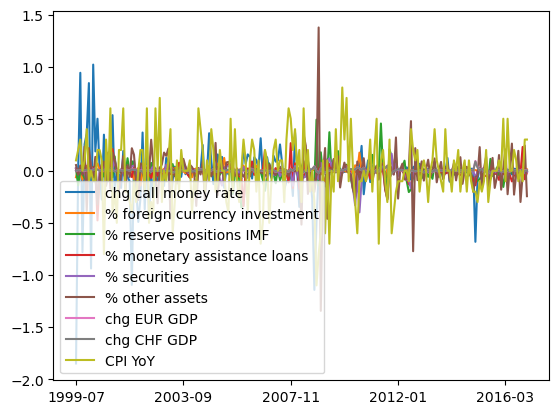

In [86]:
X.plot()